# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:
#data preparation
# Step 1: Convert data types
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df[['customer_name', 'city', 'state_province', 'product_name', 'product_line']] = df[['customer_name', 'city', 'state_province', 'product_name', 'product_line']].astype('category')

In [6]:
#outlier check and cleanup
# Step 2: Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'product_price')
# Step 3: Remove rows with NULL values
df.dropna(inplace=True)

<ipython-input-6-71c50d1f2ec4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
#impute values
# Step 4: Impute missing values
# Example: Imputing missing 'product_price' with the median (assuming this makes sense for your data)
if df['product_price'].isnull().any():
    df['product_price'].fillna(df['product_price'].median(), inplace=True)

# Add 'total_amount' variable
df['total_amount'] = df['quantity'] * df['product_price']

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [8]:
#create variable
# Create 'complete_customer_info' variable
required_fields = ['customer_name', 'city', 'state_province']
df['complete_customer_info'] = np.where(df[required_fields].isnull().any(axis=1), 2, 1)

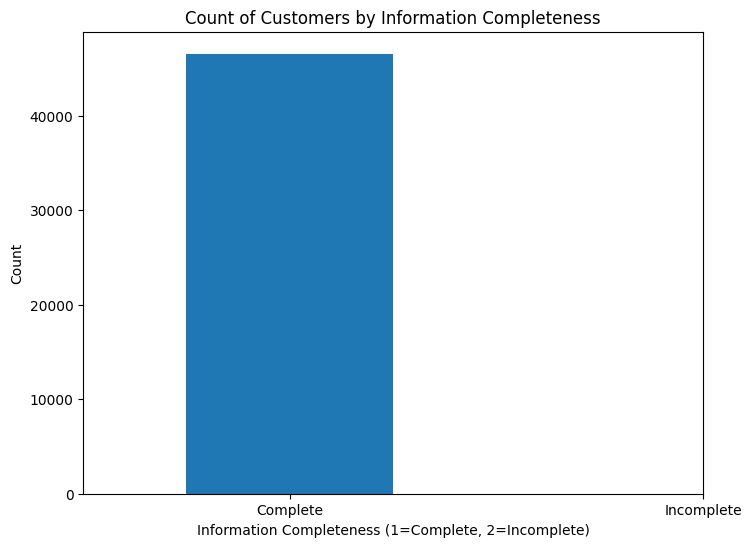

In [10]:
#create chart
# I am assuming it should show all complete because we Imputed the other missing values?
plt.figure(figsize=(8, 6))
df['complete_customer_info'].value_counts().plot(kind='bar')
plt.title('Count of Customers by Information Completeness')
plt.xlabel('Information Completeness (1=Complete, 2=Incomplete)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Complete', 'Incomplete'], rotation=0)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

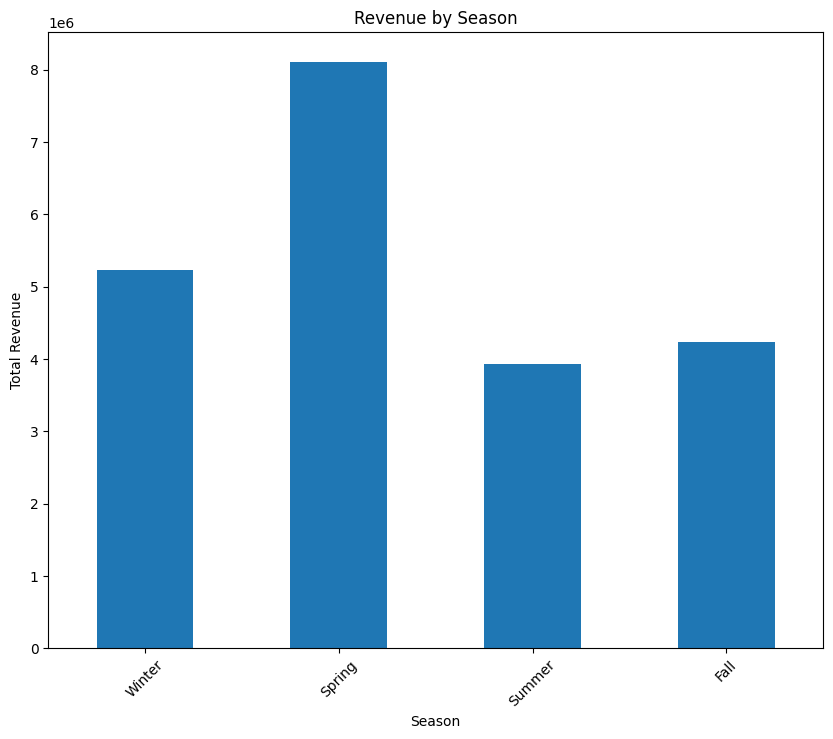

In [13]:
#seasonality
# Convert 'order_date' to datetime, coercing any errors to NaT
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# You might want to remove or handle NaT values before proceeding
df = df.dropna(subset=['order_date'])

# Proceed with the seasonal categorization
df['season'] = df['order_date'].dt.month % 12 // 3 + 1

# Mapping month to season
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(seasons)

seasonal_revenue = df.groupby('season')['total_amount'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
plt.figure(figsize=(10, 8))
seasonal_revenue.plot(kind='bar')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

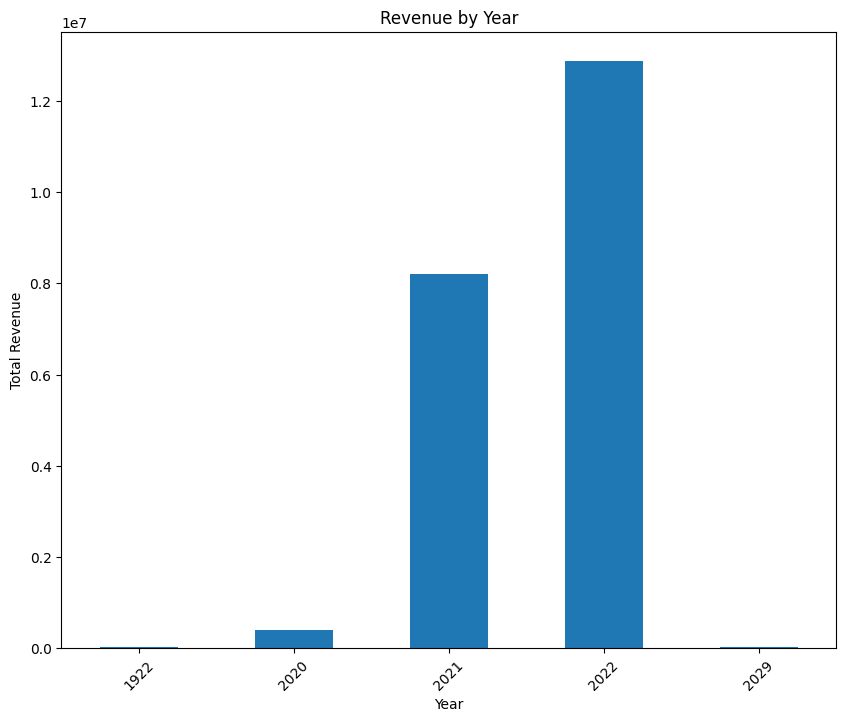

In [14]:
#revenue over time
df['year'] = pd.DatetimeIndex(df['order_date']).year
yearly_revenue = df.groupby('year')['total_amount'].sum()
plt.figure(figsize=(10, 8))
yearly_revenue.plot(kind='bar')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [15]:
#indoor/outdoor variable
def categorize_product_line(product_line):
    outdoor_products = ['Garden', 'Outdoor']
    if any(product in product_line for product in outdoor_products):
        return 'Outdoor'
    else:
        return 'Indoor'

df['product_category'] = df['product_line'].apply(categorize_product_line)

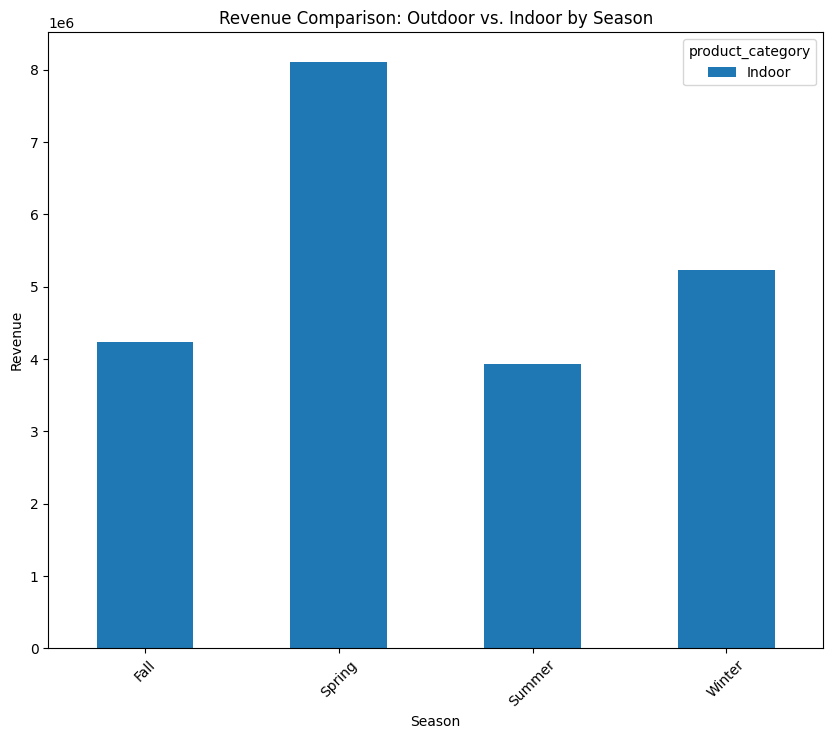

In [16]:
pivot_table = df.pivot_table(values='total_amount', index='season', columns='product_category', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Revenue Comparison: Outdoor vs. Indoor by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()